## Naive Bayes [Classification]:

- Based on Bayes Theorem [Probability of Likelihood]:
- Fast & Eff.
- Good for High Dimensional Data.
- Performs well with small datasets.
- Naive Bayes allows us `.partial_fit(<train_data_batch>)` for incremental learning [when amount of data is too large and we can't load all the data into memory] 
- Disadv.: Not good in case when the features are correlated...
---

**Naive Bayes algorithm step-by-step guide:**

- We will focus on the one based on Gaussian Probability:

- Calculate the **mean**, **std/variance** of all the features & Calculate the Classes counts too.
    - Features: $X(x_1, x_2,..., x_n)$
    - Classes: $y(y_1, y2,..., y_n)$

- Naive Bayes:

    - $P(y | x_1, x_2,...,x_n) = \frac{P(y)P(x_1,...,x_n | y)}{P(x_1,..., x_n)}$
    
    - $P(y|x_1,..., x_n) \propto P(y) \prod_{i=1}^{n} {P(x_i | y)} $

- Gaussian Naive Bayes:

    - $P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_{y}^2}}exp(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2})$
    - To find this gaussian probabilities we use that mean and variance/std that we calculated from the features.

    - $P(y)\prod_{i=1}^nP(x_i|y)$
    - We will calculate the class probabilities by using the products of gaussian probabilities and probability of occurence of class in the target classes.


- To get the **Predictions** we compute the log priors of the above and choose the class with the maximum value (prob. value)
    - $\log P(y_j|x) \propto \log P(y_j) + \sum_{i}\log{P(x_i | y_j)}$
    - Here, $j$ refers to each class.
    - $y(predicted) = arg\max{\log P(y_j | x)}$




**There are various types of naive bayes can be used depending upon usecases as follow:**

1. Gaussian Naive Bayes:

    - features -> continous numeric values (eg: age, temp, weight, price, etc...)

2. Multinomial Naive Bayes:

    - features -> Counts/frequencies of words/tokens/etc...
    - e.g.: Text classification (spam detection), TF-IDF features.


3. Bernoulli Naive Bayes:
    - features -> binary (0/1 ~ True/False ~ Yes/No ~ etc...)

4. Complement Naive Bayes:
    - better for imbalance target classes [email fraud detection]

5. Categorical Naive Bayes:
    - features -> categorical / fixed literals

If Features are mixed types then we can perform some hybrid naive bayes** approach as follow:

- Separate features by types and load different naive bayes and train them separately.
- During prediction combine the log-probabilities manually as follow to get the perfect prediction:

    $ \log P(y_j|x) = \log P(y_k) + \sum_{i=1}^n log P(y_i|x)$



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [33]:
# Generating Datasets
X, y = make_classification(
    n_samples=2000,
    n_features=7,
    n_informative=2,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=50
)

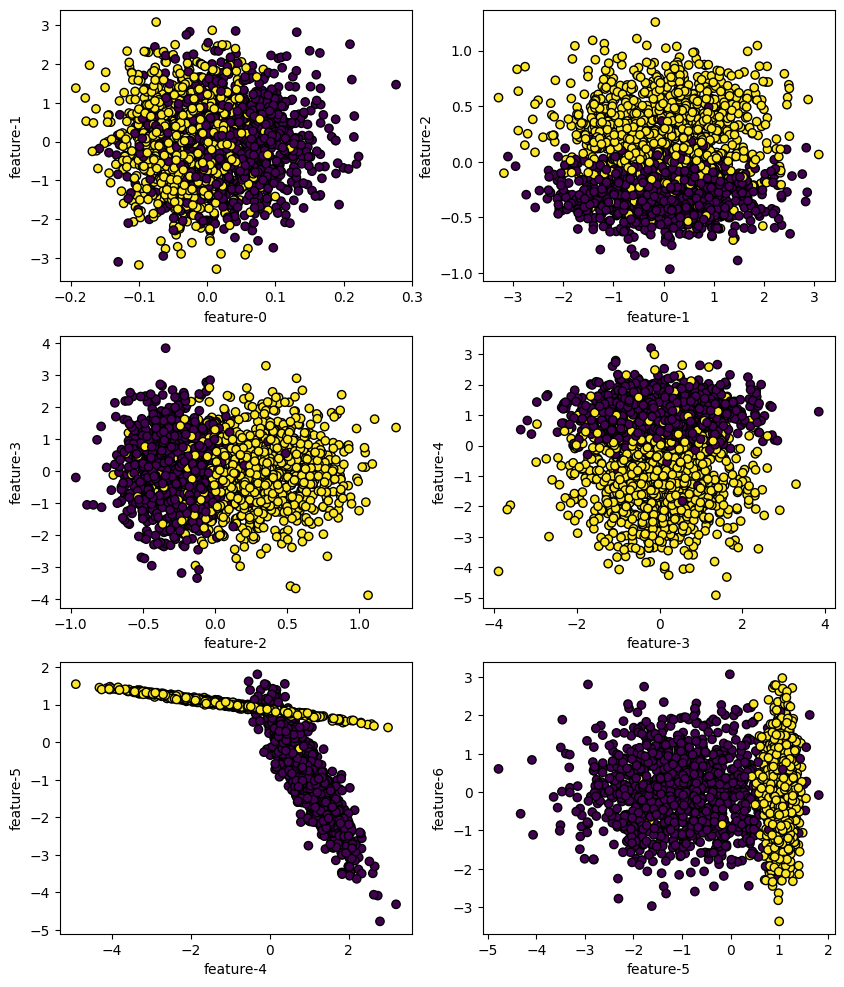

In [34]:
# Visualization of generated classification samples.
fig, axes = plt.subplots(nrows = 3, ncols=2, figsize=(10,12))

for i, ax in zip(range(7), axes.ravel()):
    ax.scatter(X[:,i], X[:, (i+1 if i!=6 else 0)], c = y, edgecolor='k')    
    ax.set_xlabel(f"feature-{i}")
    ax.set_ylabel(f"feature-{i+1 if i!=6 else 0}")
plt.show()

In [35]:
# Splitting the train test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.3)

print(f"""X_train shape: {X_train.shape}
X_test shape: {X_test.shape}""")

X_train shape: (1400, 7)
X_test shape: (600, 7)


In [ ]:
# Using Naive Bayes:
from sklearn.naive_bayes import GaussianNB

# Other naive bayes import method:
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, ComplementNB, BernoulliNB


gnb = GaussianNB()

# Fitting the Train data:
# This will perform the above mentioned step : calculation of the mean, variance, and classes counts and that can be used for the training...
gnb.fit(X_train, y_train)

GaussianNB()

In [37]:
# This will calculate the logs of the class probabilities and will find out the class with the maxi. value.
y_pred = gnb.predict(X_test)

In [38]:
gnb.score(X_test, y_test)

0.935

In [39]:
from sklearn.metrics import classification_report

gnb_report : str = classification_report(y_test, y_pred)
print(f"""Gaussian Naive Bayes Classification Report:
{gnb_report}""")

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       304
           1       0.93      0.94      0.93       296

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600



---

By Kirtan Ghelani $@SculptSoft$